In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
import set_matplotlib_hangul

In [246]:
df = pd.read_csv('final_0213.csv', index_col=0)
df.head(2)

,출연자,제목,회차,조회수,좋아요수,댓글수,재생시간(초),구독자수,term,시청률,직업,성별,나이,수상여부,인지도,에피소드,날짜
0,나영석,[선공개] 유퀴즈에 포위된 나영석 PD! 형이 왜 거기서 나와..?,40,881349,6186,224,314,0,1290,2.6,서비스,M,중년,Y,Y,40,2019-10-22
1,이명진,드라마를 위해 조셉과 거래(?) 하는 이명진PD님 |,40,173,1,1,109,0,1290,2.6,서비스,M,청년,N,N,40,2019-10-22


In [247]:
df = df.drop(['제목', '회차'], axis=1).drop(index=281, axis=0)

In [248]:
df1 = df.copy()
df1['구독자수'] = df1['구독자수'].str.replace(',', '')
df1['구독자수'] = df1['구독자수'].astype(int)

In [249]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [250]:
for column in ['수상여부', '인지도', '성별', '직업', '나이']:
    le.fit(df1[column])
    df1[column] = le.transform(df[column])

In [255]:
day_data = df1  # 날짜 컬럼 변경

day_data['날짜'] = pd.to_datetime(day_data['날짜'])
 
day_data['년'] = day_data['날짜'].dt.year
day_data['월'] = day_data['날짜'].dt.month
day_data['일'] = day_data['날짜'].dt.day

df2=day_data.drop(columns=['날짜'])


In [253]:
df3 = df2.copy()

In [256]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 834
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   출연자      834 non-null    object 
 1   조회수      834 non-null    int64  
 2   좋아요수     834 non-null    int64  
 3   댓글수      834 non-null    int64  
 4   재생시간(초)  834 non-null    int64  
 5   구독자수     834 non-null    int32  
 6   term     834 non-null    int64  
 7   시청률      834 non-null    float64
 8   직업       834 non-null    int32  
 9   성별       834 non-null    int32  
 10  나이       834 non-null    int32  
 11  수상여부     834 non-null    int32  
 12  인지도      834 non-null    int32  
 13  에피소드     834 non-null    int64  
dtypes: float64(1), int32(6), int64(6), object(1)
memory usage: 78.2+ KB


In [257]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### 년, 월, 일 백터화 하여 추가

In [258]:
def date_to_sin_cos(df, column_name):
    max_value = df[column_name].max()
    sin_col = np.sin(2 * np.pi * df[column_name] / max_value)
    cos_col = np.cos(2 * np.pi * df[column_name] / max_value)
    return sin_col, cos_col

# '년', '월', '일' 열을 사인-코사인으로 변환하여 추가
df2['년_sin'], df2['년_cos'] = date_to_sin_cos(df2, '년')
df2['월_sin'], df2['월_cos'] = date_to_sin_cos(df2, '월')
df2['일_sin'], df2['일_cos'] = date_to_sin_cos(df2, '일')

# 년 월 일 컬럼 수정 하기. 
df3 = df3.join(df2[['년_sin', '년_cos', '월_sin', '월_cos', '일_sin', '일_cos']])

In [259]:
df2 = df2.drop(columns=['년', '월', '일'])

In [260]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 834
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   출연자      834 non-null    object 
 1   조회수      834 non-null    int64  
 2   좋아요수     834 non-null    int64  
 3   댓글수      834 non-null    int64  
 4   재생시간(초)  834 non-null    int64  
 5   구독자수     834 non-null    int32  
 6   term     834 non-null    int64  
 7   시청률      834 non-null    float64
 8   직업       834 non-null    int32  
 9   성별       834 non-null    int32  
 10  나이       834 non-null    int32  
 11  수상여부     834 non-null    int32  
 12  인지도      834 non-null    int32  
 13  에피소드     834 non-null    int64  
 14  년_sin    834 non-null    float64
 15  년_cos    834 non-null    float64
 16  월_sin    834 non-null    float64
 17  월_cos    834 non-null    float64
 18  일_sin    834 non-null    float64
 19  일_cos    834 non-null    float64
dtypes: float64(7), int32(6), int64(6), object(1)
memory usage: 

In [66]:
df3 = df3.drop(columns=['년', '월', '일', '에피소드'])

In [261]:
df4 = df3.copy()

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 834
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   출연자      834 non-null    object 
 1   조회수      834 non-null    int64  
 2   좋아요수     834 non-null    int64  
 3   댓글수      834 non-null    int64  
 4   재생시간(초)  834 non-null    int64  
 5   구독자수     834 non-null    int32  
 6   term     834 non-null    int64  
 7   시청률      834 non-null    float64
 8   직업       834 non-null    int32  
 9   성별       834 non-null    int32  
 10  나이       834 non-null    int32  
 11  수상여부     834 non-null    int32  
 12  인지도      834 non-null    int32  
 13  년_sin    834 non-null    float64
 14  년_cos    834 non-null    float64
 15  월_sin    834 non-null    float64
 16  월_cos    834 non-null    float64
 17  일_sin    834 non-null    float64
 18  일_cos    834 non-null    float64
dtypes: float64(7), int32(6), int64(5), object(1)
memory usage: 143.1+ KB


### 스케일 조정

In [190]:
df3.columns

Index(['출연자', '조회수', '좋아요수', '댓글수', '재생시간(초)', '구독자수', 'term', '시청률', '직업',
       '성별', '나이', '수상여부', '인지도', '에피소드', '년', '월', '일', '년_sin', '년_cos',
       '월_sin', '월_cos', '일_sin', '일_cos'],
      dtype='object')

In [269]:
df4 = df3.copy()
X = df4.drop(columns=['출연자', '시청률', '조회수', '좋아요수', '댓글수'])
y = df4['시청률']
ss = StandardScaler()
# mm = MinMaxScaler()
# rc = RobustScaler()       
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### 하이퍼 파라메터 수정 SS

#### GradientBoostingRegressor

In [89]:
# GradientBoostingRegressor 모델 생성
gb_regressor = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

최적의 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
평균 제곱 오차 (MSE): 0.15553908653406293


#### XGBRegressor

In [90]:
# XGBRegressor 모델 생성
xgb_regressor = xgb.XGBRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
평균 제곱 오차 (MSE): 0.16099372347529062


In [91]:
grid_search.cv_results_

{'mean_fit_time': array([0.02620411, 0.01400356, 0.02477794, 0.02314167, 0.05413718,
        0.05115108, 0.01778059, 0.01737499, 0.03363767, 0.02936263,
        0.05597129, 0.06062832, 0.01896892, 0.01555524, 0.023914  ,
        0.03254523, 0.06123557, 0.05697818, 0.0281589 , 0.02636733,
        0.04710407, 0.05132451, 0.07708845, 0.08862453, 0.02227826,
        0.02534499, 0.06079035, 0.05605416, 0.09073772, 0.08354983,
        0.0211308 , 0.02290516, 0.04193516, 0.04685235, 0.07728767,
        0.0815546 , 0.04607615, 0.03953862, 0.07314754, 0.07746978,
        0.15107555, 0.15763412, 0.04079094, 0.03499484, 0.06896009,
        0.06582494, 0.13232841, 0.13134656, 0.0363389 , 0.03613987,
        0.06904569, 0.06789074, 0.13897009, 0.12900162, 0.01701684,
        0.01816893, 0.02758574, 0.02796192, 0.06089091, 0.0506609 ,
        0.01397324, 0.01424985, 0.03045902, 0.02796192, 0.05905161,
        0.05436816, 0.01513786, 0.01806126, 0.0329319 , 0.0264554 ,
        0.05880957, 0.06089778,

#### SVR

In [93]:
# SVR 모델 생성
svr = SVR()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MAE):", mae)

최적의 하이퍼파라미터: {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}
평균 제곱 오차 (MAE): 0.47074863971655706


In [94]:
rfr = RandomForestRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
y_train = y_train.values.ravel()
# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

최적의 하이퍼파라미터: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
평균 제곱 오차 (MSE): 0.47074863971655706


### ss 파라메터 결과

In [270]:

rf_model = RandomForestRegressor(max_depth = 30, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=13)
gb_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, min_samples_leaf = 1, min_samples_split =  2, n_estimators = 200, random_state=13)
xgb_model = xgb.XGBRFRegressor(colsample_bytree = 1.0,learning_rate = 0.1, max_depth = 5, min_child_weight = 1, subsample =  0.8, n_estimators = 200, random_state=13)
svm_model = SVR(C=1.0, epsilon=0.2, kernel= 'rbf')  


rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mape = mean_absolute_percentage_error(y_test, gb_predictions)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)

svn_mae = mean_absolute_error(y_test, svm_predictions)
svn_mape = mean_absolute_percentage_error(y_test, svm_predictions)

# Print evaluation metrics
print(f'Random Forest - MAE : {round(rf_mae, 2)} MAPE : {round(rf_mape, 2)}%')
print(f'Gradient Boosting - MAE : {round(gb_mae, 2)}, MAPE:{round(gb_mape, 2)}%')
print(f'XGBoost - MAE : {round(xgb_mae, 2)}, MAPE:{round(xgb_mape, 2)}%')
print(f'SVN - MAE : {round(svn_mae, 2)}, MAPE:{round(svn_mape, 2)}%')

Random Forest - MAE : 0.23 MAPE : 0.05%
Gradient Boosting - MAE : 0.15, MAPE:0.03%
XGBoost - MAE : 0.8, MAPE:0.2%
SVN - MAE : 0.46, MAPE:0.1%


In [134]:
df3 = df2.copy()
X = df3.drop(columns=['출연자', '시청률', '조회수', '좋아요수', '댓글수', '년', '월', '일'])
y = df3['시청률']
# ss = StandardScaler()
mm = MinMaxScaler()
# rc = RobustScaler()       
X = mm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [102]:
# GradientBoostingRegressor 모델 생성
gb_regressor = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

최적의 하이퍼파라미터: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
평균 제곱 오차 (MSE): 0.16595514860017913


In [101]:
# XGBRegressor 모델 생성
xgb_regressor = xgb.XGBRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
평균 제곱 오차 (MSE): 0.1691988649082755


In [103]:
# SVR 모델 생성
svr = SVR()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MAE):", mae)

최적의 하이퍼파라미터: {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}
평균 제곱 오차 (MAE): 0.48213019305120924


In [104]:
rfr = RandomForestRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
y_train = y_train.values.ravel()
# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

최적의 하이퍼파라미터: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
평균 제곱 오차 (MSE): 0.48213019305120924


c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

In [263]:

rf_model = RandomForestRegressor(max_depth = 30, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50, random_state=13)
gb_model = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 5, min_samples_leaf = 1, min_samples_split =  10, n_estimators = 50, random_state=13)
xgb_model = xgb.XGBRFRegressor(colsample_bytree = 1.0,learning_rate = 0.1, max_depth = 7, min_child_weight = 5, subsample =  1.0, n_estimators = 100, random_state=13)
svm_model = SVR(C=1.0, epsilon=0.2, kernel= 'rbf')  


rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mape = mean_absolute_percentage_error(y_test, gb_predictions)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)

svn_mae = mean_absolute_error(y_test, svm_predictions)
svn_mape = mean_absolute_percentage_error(y_test, svm_predictions)

# Print evaluation metrics
print(f'Random Forest - MAE : {round(rf_mae, 2)} MAPE : {round(rf_mape, 2)}%')
print(f'Gradient Boosting - MAE : {round(gb_mae, 2)}, MAPE:{round(gb_mape, 2)}%')
print(f'XGBoost - MAE : {round(xgb_mae, 2)}, MAPE:{round(xgb_mape, 2)}%')
print(f'SVN - MAE : {round(svn_mae, 2)}, MAPE:{round(svn_mape, 2)}%')

Random Forest - MAE : 0.32 MAPE : 0.07%
Gradient Boosting - MAE : 0.27, MAPE:0.06%
XGBoost - MAE : 0.79, MAPE:0.2%
SVN - MAE : 0.56, MAPE:0.12%


#### RobustScaler()

In [268]:
df3 = df2.copy()
X = df3.drop(columns=['출연자', '시청률', '조회수', '좋아요수', '댓글수'])
y = df3['시청률']
# ss = StandardScaler()
# mm = MinMaxScaler()
rc = RobustScaler()       
X = rc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [109]:
# GradientBoostingRegressor 모델 생성
gb_regressor = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

최적의 하이퍼파라미터: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
평균 제곱 오차 (MSE): 0.16376499253699


In [110]:
# XGBRegressor 모델 생성
xgb_regressor = xgb.XGBRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

최적의 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
평균 제곱 오차 (MSE): 0.18127311425580234


In [ ]:
# SVR 모델 생성
svr = SVR()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MAE):", mae)

In [ ]:
rfr = RandomForestRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
y_train = y_train.values.ravel()
# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_absolute_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mae)

In [130]:

rf_model = RandomForestRegressor(max_depth = 30, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50, random_state=13)
gb_model = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 5, min_samples_leaf = 1, min_samples_split =  10, n_estimators = 50, random_state=13)
xgb_model = xgb.XGBRFRegressor(colsample_bytree = 1.0,learning_rate = 0.1, max_depth = 7, min_child_weight = 5, subsample =  1.0, n_estimators = 100, random_state=13)
svm_model = SVR(C=1.0, epsilon=0.2, kernel= 'rbf')  

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mape = mean_absolute_percentage_error(y_test, gb_predictions)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)

svn_mae = mean_absolute_error(y_test, svm_predictions)
svn_mape = mean_absolute_percentage_error(y_test, svm_predictions)

# Print evaluation metrics
print(f'Random Forest - MAE : {round(rf_mae, 2)} MAPE : {round(rf_mape, 2)}%')
print(f'Gradient Boosting - MAE : {round(gb_mae, 2)}, MAPE:{round(gb_mape, 2)}%')
print(f'XGBoost - MAE : {round(xgb_mae, 2)}, MAPE:{round(xgb_mape, 2)}%')
print(f'SVN - MAE : {round(svn_mae, 2)}, MAPE:{round(svn_mape, 2)}%')

Random Forest - MAE : 0.23 MAPE : 0.05%
Gradient Boosting - MAE : 0.17, MAPE:0.04%
XGBoost - MAE : 0.79, MAPE:0.2%
SVN - MAE : 0.47, MAPE:0.1%


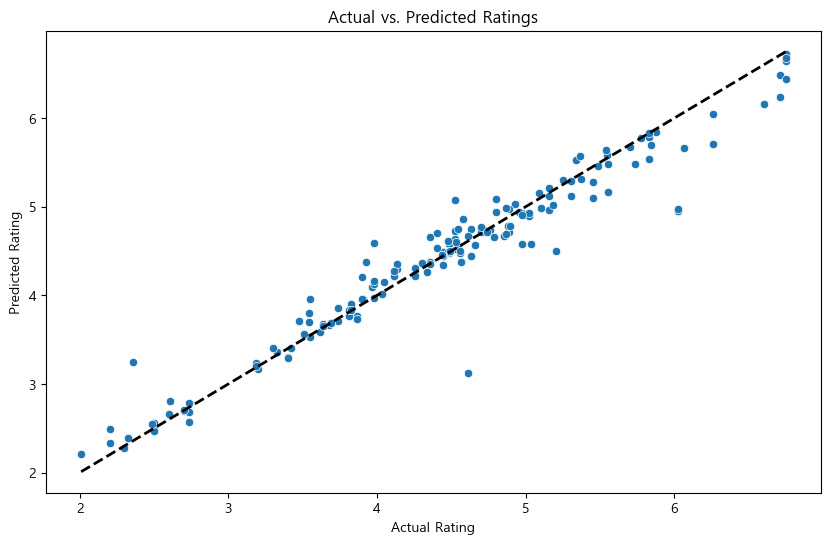

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 시청률 대 예측 시청률 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')

plt.show()
# 상관이 아니다.

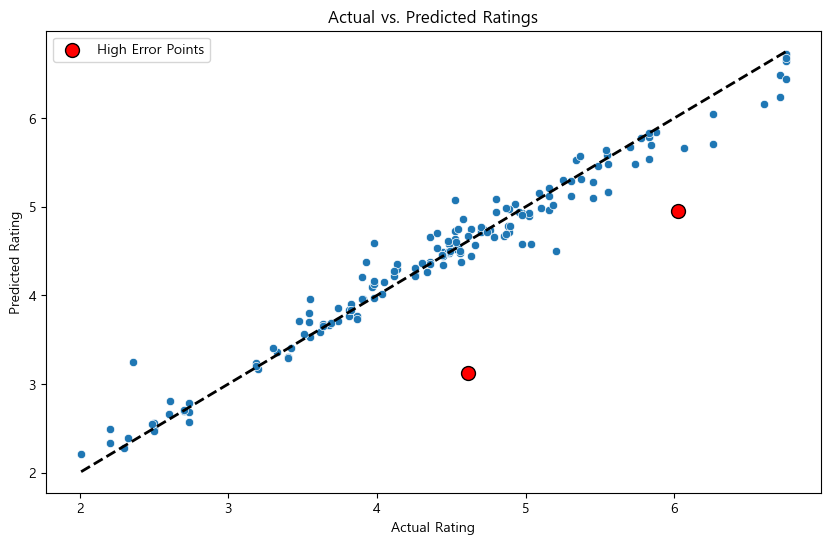

In [282]:

import numpy as np


# 기존 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')

# 에러 계산 및 가장 큰 에러를 가진 데이터 포인트 찾기
errors = np.abs(y_test - gb_predictions)
highest_error_indices = np.argsort(errors)[-2:]

# Pandas Series와 numpy 배열 처리
highest_errors_y_test = y_test.iloc[highest_error_indices] if isinstance(y_test, pd.Series) else y_test[highest_error_indices]
highest_errors_y_pred = gb_predictions[highest_error_indices]

# 강조할 데이터 포인트를 산점도에 추가
plt.scatter(highest_errors_y_test, highest_errors_y_pred, color='red', edgecolor='black', linewidth=1, s=100, marker='o', label='High Error Points')

# 범례 추가
plt.legend()

# 산점도 표시
plt.show()


In [283]:
# 가장 큰 에러를 가진 데이터 포인트의 에러 값 가져오기 (Pandas Series를 위해 .iloc 사용)
highest_errors_values = errors.iloc[highest_error_indices]

print("가장 큰 에러를 가진 데이터 포인트의 에러 값:", highest_errors_values.values)

# 원본 데이터셋에서 에러율이 가장 높은 데이터 포인트의 전체 행을 추출
high_error_points_full_rows = df.iloc[highest_error_indices]

# 결과 출력
print(high_error_points_full_rows)


가장 큰 에러를 가진 데이터 포인트의 에러 값: [1.0684939 1.484873 ]
     출연자  조회수  좋아요수  댓글수  재생시간(초)   구독자수  term  시청률    직업 성별  나이 수상여부 인지도  \
22   김현지   68     0    0      185      0  1290  2.5    기타  F  청년    N   N   
104  홍동규   38     0    0      208  60000  1271  2.3  사회복지  M  중년    N   N   

     에피소드          날짜  
22     45  2019-11-26  
104    42  2019-11-05  


In [284]:
df4 = df3.copy()
df4 = df4.drop(index=22, axis=0)
df4 = df4.drop(index=104, axis=0)
X = df4.drop(columns=['출연자', '시청률', '조회수', '좋아요수', '댓글수'])
y = df4['시청률']
ss = StandardScaler()
# mm = MinMaxScaler()
# rc = RobustScaler()       
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [285]:

rf_model = RandomForestRegressor(max_depth = 30, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50, random_state=13)
gb_model = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 5, min_samples_leaf = 1, min_samples_split =  10, n_estimators = 50, random_state=13)
xgb_model = xgb.XGBRFRegressor(colsample_bytree = 1.0,learning_rate = 0.1, max_depth = 7, min_child_weight = 5, subsample =  1.0, n_estimators = 100, random_state=13)
svm_model = SVR(C=1.0, epsilon=0.2, kernel= 'rbf')  

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mape = mean_absolute_percentage_error(y_test, gb_predictions)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)

svn_mae = mean_absolute_error(y_test, svm_predictions)
svn_mape = mean_absolute_percentage_error(y_test, svm_predictions)

# Print evaluation metrics
print(f'Random Forest - MAE : {round(rf_mae, 2)} MAPE : {round(rf_mape, 2)}%')
print(f'Gradient Boosting - MAE : {round(gb_mae, 2)}, MAPE:{round(gb_mape, 2)}%')
print(f'XGBoost - MAE : {round(xgb_mae, 2)}, MAPE:{round(xgb_mape, 2)}%')
print(f'SVN - MAE : {round(svn_mae, 2)}, MAPE:{round(svn_mape, 2)}%')

Random Forest - MAE : 0.22 MAPE : 0.05%
Gradient Boosting - MAE : 0.19, MAPE:0.05%
XGBoost - MAE : 0.8, MAPE:0.2%
SVN - MAE : 0.46, MAPE:0.1%


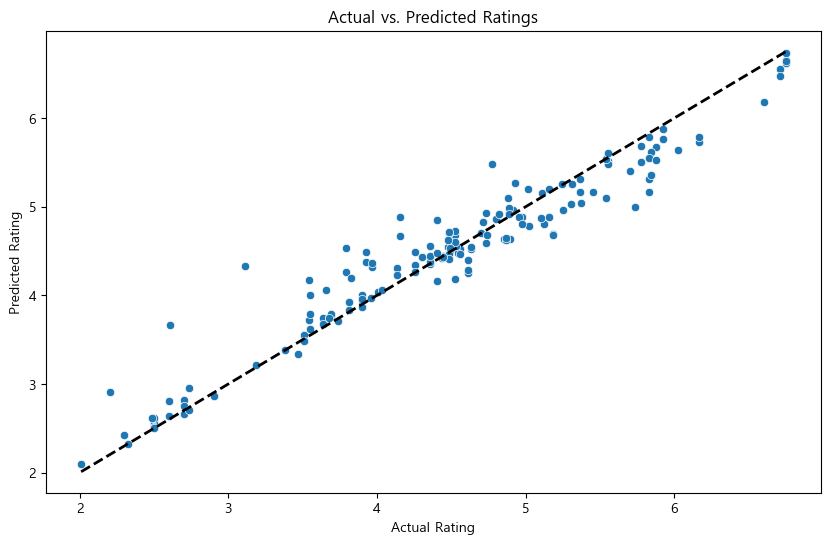

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 시청률 대 예측 시청률 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')

plt.show()
# 상관이 아니다.

```
날짜 백터 추가 전

GradientBoostingRegressor
MAE: 0.28
MAPE: 6.38%

XGBRegressor
MAE: 0.30
MAPE: 7.17%

RandomForestRegressor
MAE: 0.45
MAPE: 10.39%
-----------------------------
```

```
StandardScaler

Random Forest - MAE : 0.23 MAPE : 0.05%
Gradient Boosting - MAE : 0.15, MAPE:0.03%
XGBoost - MAE : 0.8, MAPE:0.2%
SVN - MAE : 0.46, MAPE:0.1%
```
```
MinMaxScaler

Random Forest - MAE : 0.23 MAPE : 0.05%
Gradient Boosting - MAE : 0.17, MAPE:0.04%
XGBoost - MAE : 0.79, MAPE:0.2%
SVN - MAE : 0.48, MAPE:0.11%
```
```
RobustScaler

Random Forest - MAE : 0.2 MAPE : 0.04%
Gradient Boosting - MAE : 0.16, MAPE:0.04%
XGBoost - MAE : 0.79, MAPE:0.2%
SVN - MAE : 0.47, MAPE:0.1%
```

```
Random Forest - MAE : 0.22 MAPE : 0.05%
Gradient Boosting - MAE : 0.19, MAPE:0.05%
XGBoost - MAE : 0.8, MAPE:0.2%
SVN - MAE : 0.46, MAPE:0.1%
```

xgb는 날짜 백터를 추가하면 결과가 떨어짐!!

RandomForest는 성능이 올라감

In [163]:
df3 = df2.copy()

In [157]:
from scipy.stats import norm, skew
from scipy import stats
import seaborn as sns

C:\Users\HoJin\AppData\Local\Temp\ipykernel_11920\164927136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['조회수'] , fit=norm);


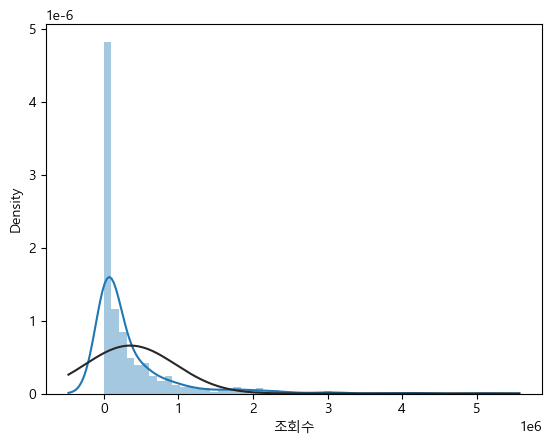

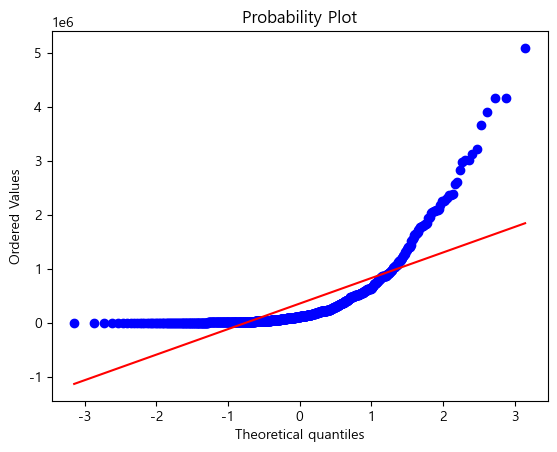

In [165]:
sns.distplot(df2['조회수'] , fit=norm);
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df2['조회수'], plot=plt)
plt.show()

### 조회수

In [152]:
df3 = df2.copy()
X = df3.drop(columns=['출연자', '시청률', '조회수', '좋아요수', '댓글수', '년', '월', '일', '년_sin', '년_cos', '월_sin', '월_cos', '일_sin', '일_cos', '에피소드'])
y = df3['조회수']
# ss = StandardScaler()
# rc = RobustScaler()       
# X = rc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [166]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 324477.227238638
MAPE: 1508.0906693114932


In [153]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae, mape)

324477.227238638 15.080906693114931


In [149]:
X

,재생시간(초),구독자수,term,직업,성별,나이,수상여부,인지도
0,314,0,1290,3,1,2,1,1
1,109,0,1290,3,1,3,0,0
2,394,0,1290,0,0,2,0,0
3,394,0,1290,0,0,3,0,0
4,394,0,1290,0,0,0,0,0
...,...,...,...,...,...,...,...,...
830,983,894000,29,6,1,3,1,1
831,501,894000,29,6,0,3,1,1
832,1044,897000,22,4,0,0,1,1
833,1044,897000,22,4,0,0,1,1


In [146]:
df3 = df2.copy()
X = df3.drop(columns=['출연자', '시청률', '조회수', '좋아요수', '댓글수', '년', '월', '일', '년_sin', '년_cos', '월_sin', '월_cos', '일_sin', '일_cos', '에피소드'])
y = df3['조회수']
# ss = StandardScaler()
rc = RobustScaler()       
X = rc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [147]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae, mape)

324477.227238638 15.080906693114931


In [118]:
df3 = df2.copy()
X = df3.drop(columns=['출연자', '시청률', '조회수', '좋아요수', '댓글수'])
y = df3['조회수']
# ss = StandardScaler()
rc = RobustScaler()       
X = rc.fit_transform(X)
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [119]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae, mape)

1.0867135495318623 0.10403475069121669


In [116]:
df3 = df2.copy()
X = df3.drop(columns=['출연자', '시청률', '조회수'])
y = df3['조회수']
# ss = StandardScaler()
rc = RobustScaler()       
X = rc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [117]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae, mape)

108218.44186611519 1.2037611436334612


In [168]:
df3 = df2.copy()
X = df3.drop(columns=['출연자', '시청률', '조회수'])
y = df3['조회수']
# ss = StandardScaler()
rc = RobustScaler()       
X = rc.fit_transform(X)
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [173]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae, mape)

0.29084255672555204 0.02938285474294695


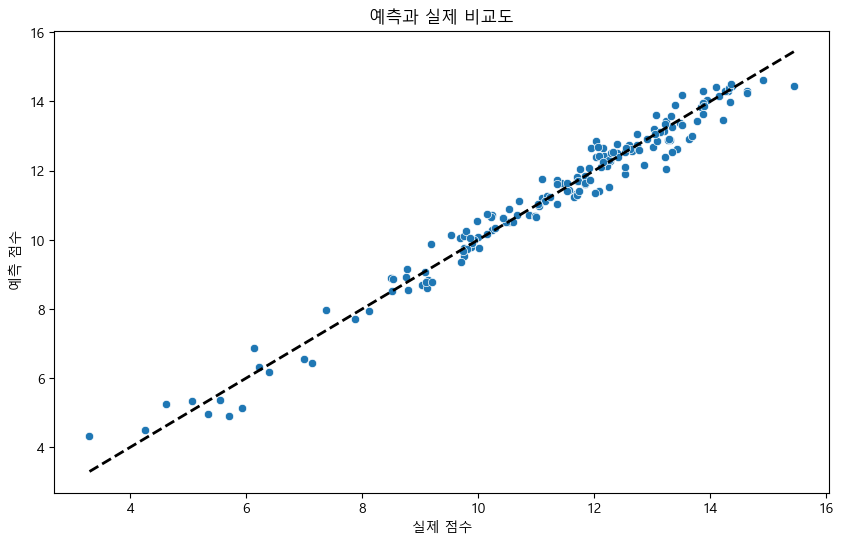

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 조회수 대 예측 조회수 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('실제 점수')
plt.ylabel(' 예측 점수')
plt.title('예측과 실제 비교도')

plt.show()
# 상관이 아니다.